In [1]:
from config.config import NASA_API_KEY
from googleapiclient.discovery import build
from IPython.display import JSON

In [2]:
import requests
from config.config import NASA_API_KEY  # API anahtarın burada olsun

url = "https://api.nasa.gov/planetary/apod"
params = {
    "api_key": NASA_API_KEY
}

response = requests.get(url, params=params)
data = response.json()

print(data)


{'date': '2025-05-08', 'explanation': "Cataloged as M1, the Crab Nebula is the first on Charles Messier's famous list of things which are not comets. In fact, the Crab Nebula is now known to be a supernova remnant, an expanding cloud of debris from the death explosion of a massive star. The violent birth of the Crab was witnessed by astronomers in the year 1054. Roughly 10 light-years across, the nebula is still expanding at a rate of about 1,500 kilometers per second. You can see the expansion by comparing these sharp images from the Hubble Space Telescope and James Webb Space Telescope. The Crab's dynamic, fragmented filaments were captured in visible light by Hubble in 2005 and Webb in infrared light in 2023. This cosmic crustacean lies about 6,500 light-years away in the constellation Taurus.", 'hdurl': 'https://apod.nasa.gov/apod/image/2505/Crab_Webb_998.jpg', 'media_type': 'image', 'service_version': 'v1', 'title': 'M1: The Incredible Expanding Crab', 'url': 'https://apod.nasa.go

In [3]:
import requests
import pandas as pd
from config.config import NASA_API_KEY  # Burada API key'in tanımlı

# APOD endpoint
url = "https://api.nasa.gov/planetary/apod"

# Parametreler
params = {
    "api_key": NASA_API_KEY,
    "count": 5  # Rasgele 5 APOD verisi getirir
}

# İstek gönder
response = requests.get(url, params=params)
data = response.json()

# DataFrame'e çevir
df_apod = pd.DataFrame(data)

# İlk 5 satırı yazdır
print(df_apod[['date', 'title', 'url', 'explanation']])


         date                                title  \
0  2022-11-15                   Wolf's Cave Nebula   
1  2024-11-01               Spiral Galaxy NGC 6744   
2  2012-01-23   Deep Orion Over the Canary Islands   
3  2008-06-25            What is Hanny's Voorwerp?   
4  2000-05-03  BOOMERANG Images The Early Universe   

                                                 url  \
0  https://apod.nasa.gov/apod/image/2211/WolfsCav...   
1  https://apod.nasa.gov/apod/image/2411/NGC6744_...   
2  https://apod.nasa.gov/apod/image/1201/oriontei...   
3  https://apod.nasa.gov/apod/image/0806/hannysvo...   
4  https://apod.nasa.gov/apod/image/0005/earlyuni...   

                                         explanation  
0  The mysterious blue reflection nebula found in...  
1  Big, beautiful spiral galaxy NGC 6744 is nearl...  
2  Which attracts your eye more -- the sky or the...  
3  What is that green thing? A volunteer sky enth...  
4  Drifting through the stratosphere above Antarc...  


In [4]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from config.config import NASA_API_KEY

# Tarihleri ayarla
end_date = datetime.today().date()
start_date = end_date - timedelta(days=4)

# API URL ve parametreler
url = "https://api.nasa.gov/planetary/apod"
params = {
    "api_key": NASA_API_KEY,
    "start_date": start_date.isoformat(),
    "end_date": end_date.isoformat()
}

# İstek gönder ve veriyi çek
response = requests.get(url, params=params)
data = response.json()

# DataFrame'e çevir
df_apod = pd.DataFrame(data)

# Tarihe göre sırala (istek tersten dönebilir)
df_apod = df_apod.sort_values("date")

# Görüntüle
print(df_apod[['date', 'title', 'url', 'explanation']])


         date                                          title  \
0  2025-05-04           Spin up of a Supermassive Black Hole   
1  2025-05-05                      Planet Lines Across Water   
2  2025-05-06  The Doubly Warped World of Binary Black Holes   
3  2025-05-07                    Galaxy Wars: M81 versus M82   
4  2025-05-08              M1: The Incredible Expanding Crab   

                                                 url  \
0  https://apod.nasa.gov/apod/image/2505/blackhol...   
1  https://apod.nasa.gov/apod/image/2505/PlanetLi...   
2    https://www.youtube.com/embed/rQcKIN9vj3U?rel=0   
3  https://apod.nasa.gov/apod/image/2505/M81M82_C...   
4  https://apod.nasa.gov/apod/image/2505/Crab_Web...   

                                         explanation  
0  How fast can a black hole spin?  If any object...  
1  What’s causing those lines? Objects in the sky...  
2  If one black hole looks strange, what about tw...  
3  In the upper left corner, surrounded by blue a...  
4  

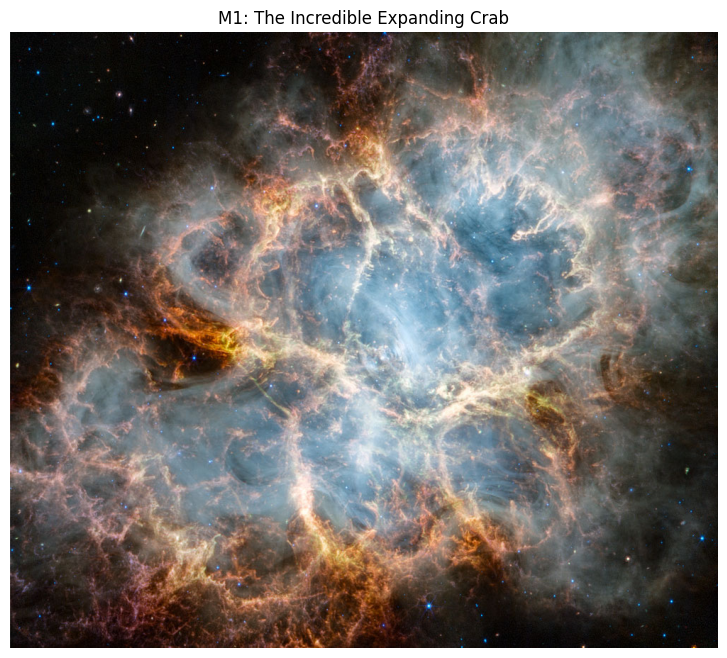

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Görsel bağlantısını seç (örnek: son görsel)
image_url = df_apod.iloc[-1]['url']

# Görseli çek
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Görseli göster
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title(df_apod.iloc[-1]['title'])
plt.show()


In [6]:
from IPython.display import Image, display

# Son 5 görseli filtrele
df_images = df_apod[df_apod['media_type'] == 'image']
last_5_images = df_images.tail(5)

# Görselleri ve başlıkları göster
for index, row in last_5_images.iterrows():
    print(row['title'])
    display(Image(url=row['url']))


Spin up of a Supermassive Black Hole


Planet Lines Across Water


Galaxy Wars: M81 versus M82


M1: The Incredible Expanding Crab


# ASTROİD BİLGİSİ

In [10]:
import requests

asteroid_url = f"https://api.nasa.gov/neo/rest/v1/feed?start_date=2025-05-01&end_date=2025-05-07&api_key={NASA_API_KEY}"
response = requests.get(asteroid_url).json()

# Asteroid verilerini kontrol edelim
near_earth_objects = response.get('near_earth_objects', {})

for date in near_earth_objects:
    print(f"Asteroidler {date} tarihlerinde şunlardı:")
    for asteroid in near_earth_objects[date]:
        name = asteroid.get('name', 'Bilinmeyen')
        
        # Çap bilgilerini güvenli bir şekilde almak için 'estimated_diameter' kontrolü
        diameter_info = asteroid.get('estimated_diameter', {}).get('kilometers', {})
        min_diameter = diameter_info.get('estimated_diameter_min', 'Veri yok')
        max_diameter = diameter_info.get('estimated_diameter_max', 'Veri yok')
        
        print(f"İsim: {name}, Minimum Çap: {min_diameter} km, Maksimum Çap: {max_diameter} km")


Asteroidler 2025-05-01 tarihlerinde şunlardı:
İsim: (2007 GW4), Minimum Çap: 0.2016299194 km, Maksimum Çap: 0.4508582062 km
İsim: (2021 CR1), Minimum Çap: 0.0253837029 km, Maksimum Çap: 0.0567596853 km
İsim: (2021 GT16), Minimum Çap: 0.0088014652 km, Maksimum Çap: 0.0196806745 km
İsim: (2021 JZ2), Minimum Çap: 0.0695913044 km, Maksimum Çap: 0.1556108872 km
İsim: (2024 BF), Minimum Çap: 0.0340843469 km, Maksimum Çap: 0.0762149166 km
İsim: (2025 GT1), Minimum Çap: 0.0272618282 km, Maksimum Çap: 0.060959301 km
İsim: (2025 HE1), Minimum Çap: 0.0341943991 km, Maksimum Çap: 0.0764610009 km
İsim: (2025 HN1), Minimum Çap: 0.0223128464 km, Maksimum Çap: 0.0498930414 km
İsim: (2025 HF2), Minimum Çap: 0.0332165847 km, Maksimum Çap: 0.0742745414 km
İsim: (2025 HP3), Minimum Çap: 0.0452433732 km, Maksimum Çap: 0.1011672579 km
İsim: (2025 JB), Minimum Çap: 0.0083705689 km, Maksimum Çap: 0.0187171611 km
İsim: (2025 JF), Minimum Çap: 0.0051994209 km, Maksimum Çap: 0.0116262586 km
Asteroidler 2025-05-0

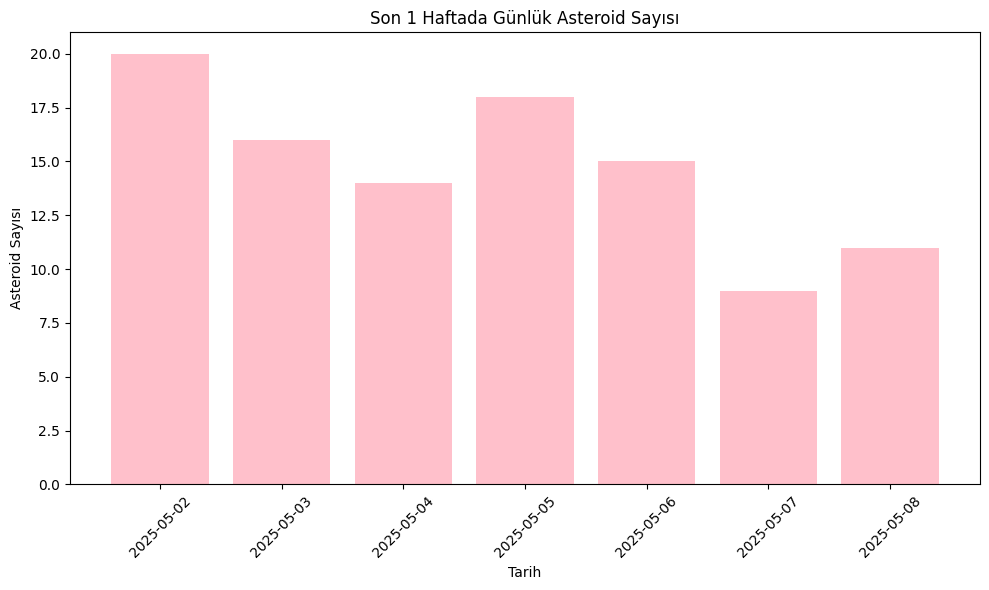

In [13]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Bugünün tarihini al
end_date = datetime.today().date()

# 7 gün öncesini hesapla
start_date = end_date - timedelta(days=6)

# NASA API URL'si
asteroid_url = f"https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date}&api_key={NASA_API_KEY}"
response = requests.get(asteroid_url).json()

# Asteroid verilerini al
near_earth_objects = response.get('near_earth_objects', {})

# Günlük asteroid sayısını tutacak bir liste
daily_asteroid_counts = {}

# Verileri işlemeye başlıyoruz
for date, asteroids in near_earth_objects.items():
    daily_asteroid_counts[date] = len(asteroids)

# Veriyi datetime objesine göre sıralama (string yerine datetime kullanacağız)
sorted_dates = sorted(daily_asteroid_counts.keys(), key=lambda x: datetime.strptime(x, "%Y-%m-%d"))

# Sıralanan tarihlerle bar chart verilerini hazırlama
sorted_counts = [daily_asteroid_counts[date] for date in sorted_dates]

# Bar chart'ı çizme
plt.figure(figsize=(10,6))
plt.bar(sorted_dates, sorted_counts, color='pink')

# Grafik başlıkları ve etiketler
plt.title('Son 1 Haftada Günlük Asteroid Sayısı')
plt.xlabel('Tarih')
plt.ylabel('Asteroid Sayısı')

# Tarih etiketlerinin düzgün görünmesi için döndürme
plt.xticks(rotation=45)

# Grafiği gösterme
plt.tight_layout()
plt.show()
